In [ ]:
import requests
import pandas as pd

In [ ]:
r = requests.get("https://gutendex.com/books/?topic=children").json()


In [ ]:
books = pd.DataFrame()
for b in r["results"][:150]:
    # book_author = b["title"], "-", b["authors"][0]["name"]
    books["title"] = b["title"]
    books["author"] = b["authors"][0]["name"]
    # books["name"] = b["authors"][0]["name"]
    print(b["title"], "-", b["authors"][0]["name"])

books.head()


In [ ]:
b

In [ ]:
import os
import yaml
from functools import lru_cache
yaml_path = '/Users/brandonedwards/Library/CloudStorage/OneDrive-Personal/Python Projects/GitHub/PythonProject/HomeworkHelper/data/grammar_concept_map.yaml'

In [ ]:
def _load_concept_map_uncached(subject: str = "grammar"):
    """
    Loads the concept map YAML for a given subject (e.g., grammar, math).
    Falls back gracefully if the file doesn't exist.
    """

    if not os.path.exists(yaml_path):
        raise FileNotFoundError(f"No concept map found for subject: {subject} ({yaml_path})")

    with open(yaml_path, "r") as f:
        print(f"DEBUG: Loading YAML: {yaml.safe_load(f)}")
        return yaml.safe_load(f)

@lru_cache(maxsize=None)
def load_concept_map(subject: str = "grammar"):
    return _load_concept_map_uncached(subject)

In [ ]:
with open(yaml_path, "r") as f:
    
    # print(f"DEBUG: Loading YAML: {yaml.safe_load(f)}")
    yaml_file = yaml.safe_load(f)
    # print(yaml.safe_load(f))

In [ ]:
yaml_file['grammar'].keys()

In [ ]:
def get_question_focus(topic: str, subject: str = "grammar") -> str:
    """
    Retrieves the 'question_focus' prompt for a given topic from the concept map YAML.
    Returns None if not found.
    """
    import streamlit as st
    try:
        concept_map = load_concept_map(subject)
        if not concept_map:
            st.write("DEBUG: Concept map is None or empty.")
            return None
        st.write(f"DEBUG: Loaded concept map keys: {list(concept_map.keys())}")

        for category, topics in concept_map.items():
            st.write(f"DEBUG: Checking category '{category}'")
            if isinstance(topics, dict):
                for t_key, t_val in topics.items():
                    st.write(f"DEBUG: Checking topic '{t_key}' in category '{category}'")
                    if t_key == topic:
                        st.write(f"DEBUG: Found topic match: {topic} in category '{category}'")
                        qf = t_val.get("question_focus")
                        st.write(f"DEBUG: Question focus: {qf}")
                        return qf
    except Exception as e:
        st.write(f"DEBUG: Exception in get_question_focus: {e}")
        pass
    return None

In [ ]:
print(concept_map)

In [ ]:
def detect_category_for_topic(topic: str, subject: str = "grammar") -> str:
    """
    Detects which category a topic belongs to within a subject's concept map.
    Returns 'general' if not found.
    """
    import streamlit as st

    try:
        concept_map = load_concept_map(subject)
        subject_data = concept_map.get(subject, concept_map)
        print(f"DEBUG: Loaded concept map keys: {list(subject_data.keys())}")

        topic_lower = topic.lower()

        for category, topics in subject_data.items():
            if isinstance(topics, list):
                # For simple list categories like ['verbs', 'nouns', ...]
                if any(t.lower() == topic_lower for t in topics):
                    print(f"DEBUG: Found match for topic '{topic}' in category '{category}'")
                    return category

            elif isinstance(topics, dict):
                # For nested dict structures
                for subcat, subtopics in topics.items():
                    if isinstance(subtopics, list) and any(t.lower() == topic_lower for t in subtopics):
                        print(f"DEBUG: Found match for topic '{topic}' in subcategory '{subcat}' under '{category}'")
                        return subcat

    except Exception as e:
        print(f"DEBUG: Exception in detect_category_for_topic: {e}")

    return "general"

In [ ]:
from utils.concept_map_db import get_concept

print(get_concept("comma"))
import os

# Use relative path from notebook location
DB_PATH = os.path.abspath("../data/homework_helper.db")
# or if notebook is in project root:
# DB_PATH = os.path.abspath("./data/homework_helper.db")
DB_PATH


In [ ]:
import yaml

with open("data/grammar_combined.yaml", "r") as f:
    data = yaml.safe_load(f)

print(len(data.keys()))
print(list(data.keys())[:5])  # preview first few topics

In [ ]:
import datetime, os, yaml, sys, streamlit as st, sqlite3
from datetime import datetime
from utils.topic_manager import sync_topics_to_concepts


DB_PATH = "data/homework_helper.db"
def get_connection():
    return sqlite3.connect(DB_PATH)
YAML_PATH = "data/grammar_hints.yaml"


In [ ]:
sync_topics_to_concepts()

In [ ]:
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

resp = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": "Write one sentence about nouns."}]
)
print(resp.choices[0].message.content)

In [1]:
from utils.topic_manager import sync_yaml_to_db

topics = sync_yaml_to_db()

2025-10-20 20:28:41.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-20 20:28:41.468 
  command:

    streamlit run /Users/brandonedwards/Library/CloudStorage/OneDrive-Personal/Python Projects/GitHub/PythonProject/HomeworkHelper/.venv/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-10-20 20:28:41.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-20 20:28:41.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-20 20:28:41.469 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-20 20:28:41.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-20 20:28:41.470 Thread 'MainThread': missing ScriptRunContex

Loaded 67 topics from YAML
🔄 Updated: adjective
🔄 Updated: adverb
🔄 Updated: article
🔄 Updated: fragment
🔄 Updated: homonym
🔄 Updated: paragraph
🔄 Updated: transition_words
🔄 Updated: conjunction
🔄 Updated: interjection
🔄 Updated: noun
🔄 Updated: preposition
🔄 Updated: pronoun
🔄 Updated: verb
🔄 Updated: modifier
🔄 Updated: subject
🔄 Updated: predicate
🔄 Updated: clause
🔄 Updated: phrase
🔄 Updated: simple_sentence
🔄 Updated: compound_sentence
🔄 Updated: complex_sentence
🔄 Updated: compound_complex_sentence
🔄 Updated: sentence_fragment
🔄 Updated: run_on_sentence
🔄 Updated: subject_verb_agreement
🔄 Updated: verb_tense
🔄 Updated: capitalization
🔄 Updated: punctuation
🔄 Updated: period
🔄 Updated: comma
🔄 Updated: semicolon
🔄 Updated: colon
🔄 Updated: apostrophe
🔄 Updated: quotation_marks
🔄 Updated: question_mark
🔄 Updated: exclamation_point
🔄 Updated: parentheses
🔄 Updated: hyphen_dash
🔄 Updated: clarity
🔄 Updated: coherence
🔄 Updated: sentence_variety
🔄 Updated: transitions
🔄 Updated: word

In [ ]:
topics['adjective']['category']

<function matplotlib.pyplot.show(close=None, block=None)>

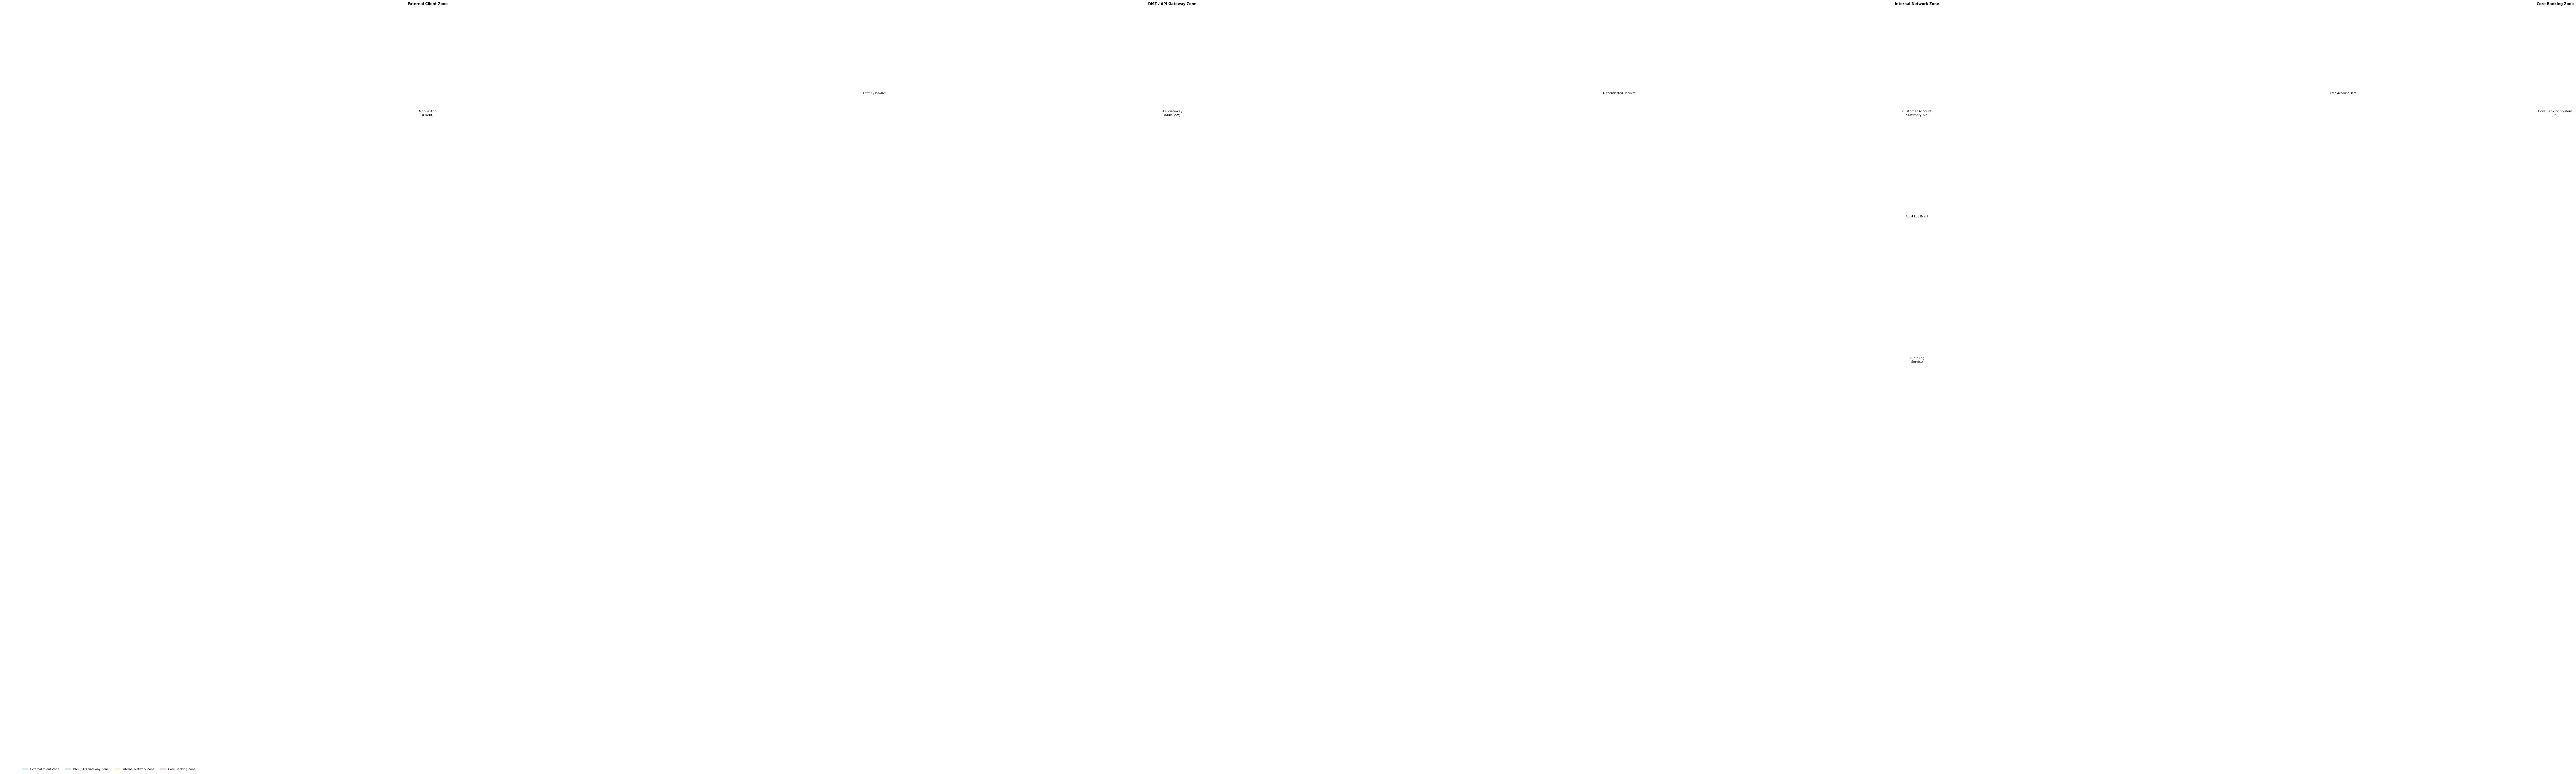

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.axis("off")

# Define zones (x, y, width, height, label, color)
zones = [
    (0.5, 4.5, 3, 2, "External Client Zone", "#d9eaf7"),
    (4, 4.5, 3, 2, "DMZ / API Gateway Zone", "#d4edda"),
    (7.5, 4.5, 3, 2, "Internal Network Zone", "#fff3cd"),
    (10.5, 4.5, 3, 2, "Core Banking Zone", "#f8d7da"),
]

# Draw zone rectangles
for x, y, w, h, label, color in zones:
    rect = mpatches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02", fc=color, ec="black")
    ax.add_patch(rect)
    ax.text(x + w/2, y + h - 0.3, label, ha="center", va="top", fontsize=11, fontweight="bold")

# Define components (x, y, label)
components = [
    (2, 5.3, "Mobile App\n(Client)"),
    (5.5, 5.3, "API Gateway\n(MuleSoft)"),
    (9, 5.3, "Customer Account\nSummary API"),
    (12, 5.3, "Core Banking System\n(FIS)"),
    (9, 3.3, "Audit Log\nService"),
]

# Draw components
for x, y, label in components:
    rect = mpatches.FancyBboxPatch((x - 0.8, y - 0.4), 1.6, 0.8, boxstyle="round,pad=0.02", fc="white", ec="black")
    ax.add_patch(rect)
    ax.text(x, y, label, ha="center", va="center", fontsize=10)

# Arrows (x_start, y_start, x_end, y_end, label)
arrows = [
    (3.5, 5.3, 4.7, 5.3, "HTTPS / OAuth2"),
    (7, 5.3, 8.2, 5.3, "Authenticated Request"),
    (10.8, 5.3, 11.2, 5.3, "Fetch Account Data"),
    (9, 4.9, 9, 3.7, "Audit Log Event"),
]

# Draw arrows
for x1, y1, x2, y2, label in arrows:
    ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", lw=1.5, color="black"))
    ax.text((x1 + x2)/2, (y1 + y2)/2 + 0.15, label, ha="center", va="bottom", fontsize=9, color="black")

# Add legend for color meaning
legend_patches = [
    mpatches.Patch(color="#d9eaf7", label="External Client Zone"),
    mpatches.Patch(color="#d4edda", label="DMZ / API Gateway Zone"),
    mpatches.Patch(color="#fff3cd", label="Internal Network Zone"),
    mpatches.Patch(color="#f8d7da", label="Core Banking Zone")
]
ax.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=9, frameon=False)
plt.show

In [1]:
from utils.db import get_prompt_template

parts_of_speech,noun
punctuation,colon
sentence_structure,compound_sentence


In [3]:
get_prompt_template(category="punctuation", topic="colon")

'Ask when a colon should be used, giving 4 examples that differ by punctuation usage. Keep language clear for 5th graders.'

In [ ]:
db_path =

In [2]:
import sqlite3
import pandas as pd

# Load CSV
df = pd.read_csv('/Users/brandonedwards/Library/CloudStorage/OneDrive-Personal/Python Projects/GitHub/PythonProject/JobProject/proof_exports/csv files/main_prompts.csv')

# Connect to DB
conn = sqlite3.connect('data/homework_helper.db')

# Write to temp_prompts table
df.to_sql("temp_prompts", conn, if_exists="replace", index=False)

conn.close()

In [10]:
import sqlite3
import yaml

# --- CONFIG ---
yaml_file = "data/grammar_combined.yaml"      # path to your YAML file
db_file = "data/homework_helper.db"           # path to your SQLite database

# # --- LOAD YAML ---
# with open(yaml_file, "r") as f:
#     grammar_data = yaml.safe_load(f)
#
# print(f"Loaded {len(grammar_data)} topics from YAML")


In [11]:
import sqlite3
import yaml

          # path to your SQLite database

# --- LOAD YAML ---
with open(yaml_file, "r") as f:
    grammar_data = yaml.safe_load(f)

print(f"Loaded {len(grammar_data)} topics from YAML")

# --- CONNECT TO DB ---
conn = sqlite3.connect(db_file)
cur = conn.cursor()

updated_count = 0
missing_count = 0

for topic, data in grammar_data.items():
    category = data.get("category", "").strip()
    examples = data.get("examples", "").strip() if data.get("examples") else None

    if not examples:
        continue

    # Update matching prompt entry
    cur.execute("""
        UPDATE prompts
        SET example = ?
        WHERE category = ? AND topic = ?;
    """, (examples, category, topic))

    if cur.rowcount > 0:
        updated_count += 1
    else:
        missing_count += 1
        print(f"⚠️ No matching record for topic '{topic}' (category: {category})")

conn.commit()
conn.close()

print(f"✅ Updated examples for {updated_count} records.")
if missing_count:
    print(f"⚠️ {missing_count} topics not found in prompts table.")

Loaded 67 topics from YAML
⚠️ No matching record for topic 'adjective' (category: parts_of_speech)
✅ Updated examples for 66 records.
⚠️ 1 topics not found in prompts table.
